# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 6: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [3]:
# Cell type : CodeWrite

pi=np.pi

class Normal_Dist():            # PASSED
    def __init__(self,mu,sig):
        self.mu=mu
        self.sig=sig
        self.dim_in=len(mu) ## for further improvization, check whether dimensions of mu and sig are equal...
    
    def value(self,x):
        d=self.dim_in
        x_cen=x-self.mu
        sig_inv=np.linalg.inv(self.sig)
        x_cen=x_cen.reshape(1,2)
        val= np.sqrt(   ((2*pi)**(d))*(np.abs(np.linalg.det(self.sig)))   )
        val=(1/val)*( np.exp(-0.5*( x_cen @ sig_inv @ x_cen.transpose() )) )
        return val[0][0]

def catog_indices(Y_train):
    lst_y_a=[] #stores indices of X's correspondint to y=-1
    lst_y_b=[] #stores indices of X's correspondint to y=+1
    cnt=0
    for i in Y_train:
        if i==-1:
            lst_y_a.append(cnt)
        if i==+1:
            lst_y_b.append(cnt)
        cnt=cnt+1
    return [lst_y_a,lst_y_b]

def function_for_A(X_train, Y_train, X_test, *args,**kwargs):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    k      : Alters the decision boundary equation by factor of 'k'
    # Note : k=1 is taken by default is no value for k is passed

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    k=kwargs.get('k',1)

    Y_test_pred=np.zeros(X_test.shape[0])

    [lst_y_a,lst_y_b]=catog_indices(Y_train)
    p_a = len(lst_y_a)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=-1)
    p_b = len(lst_y_b)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=+1)
    
    mu_minus=X_train[lst_y_a].mean(axis=0)
    mu_plus=X_train[lst_y_b].mean(axis=0)

    Iden=np.diag( np.ones(X_train.shape[1]) )
    NDa=Normal_Dist(mu_minus,Iden)  # probability of P(X|Y=-1)
    NDb=Normal_Dist(mu_plus,Iden)   # probability of P(X|Y=+1)

    # Classifier
    for i in range(0, X_train.shape[0] ):
        if ( p_a*NDa.value(X_test[i])*k > p_b*NDb.value(X_test[i]) ):
            Y_test_pred[i]=-1
        if ( p_a*NDa.value(X_test[i])*k <= p_b*NDb.value(X_test[i]) ):
            Y_test_pred[i]=+1
    
    return Y_test_pred

    
def function_for_B(X_train, Y_train, X_test, *args,**kwargs):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    k      : Alters the decision boundary equation by factor of 'k'
    # Note : k=1 is taken by default is no value for k is passed

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    k=kwargs.get('k',1)

    Y_test_pred=np.zeros(X_test.shape[0])
    lst_y_a=[] #stores indices of X's correspondint to y=-1
    lst_y_b=[] #stores indices of X's correspondint to y=+1
    cnt=0

    [lst_y_a,lst_y_b]=catog_indices(Y_train)
    p_a = len(lst_y_a)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=-1)
    p_b = len(lst_y_b)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=+1)

    mu_minus=X_train[lst_y_a].mean(axis=0)
    mu_plus=X_train[lst_y_b].mean(axis=0)

    mu=(X_train.mean(axis=0))               # Estimating value of µ

    sig=np.zeros((X_train.shape[1],X_train.shape[1]))

    for i in X_train:                       # Estimating value of ∑
        sig=sig+( (i-mu).reshape(2,1) )@( (i-mu).reshape(1,2))
    sig=sig/(X_train.shape[0])

    NDa=Normal_Dist(mu_minus,sig)
    NDb=Normal_Dist(mu_plus,sig)
    
    # Classifier
    for i in range(0, X_train.shape[0] ):
        if ( p_a*NDa.value(X_test[i])*k > p_b*NDb.value(X_test[i]) ): 
            Y_test_pred[i]=-1
        else:  #if ( p_a*NDa.value(X_train[i])*k <= p_b*NDb.value(X_train[i]) )
            Y_test_pred[i]=+1
    
    return Y_test_pred

def function_for_C(X_train, Y_train, X_test, *args,**kwargs):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    
    k      : Alters the decision boundary equation by factor of 'k'
    # Note : k=1 is taken by default is no value for k is passed

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    k=kwargs.get('k',1)
    
    Y_test_pred=np.zeros(X_test.shape[0])

    [lst_y_a,lst_y_b]=catog_indices(Y_train)
    p_a = len(lst_y_a)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=-1)
    p_b = len(lst_y_b)/(len(lst_y_a)+len(lst_y_b)) # probability of P(Y=+1)
    
    mu_minus=(X_train[lst_y_a]).mean(axis=0)    # Estimating value of µ-

    mu_plus=(X_train[lst_y_b]).mean(axis=0)     # Estimating value of µ+

    sig_minus=np.zeros((X_train.shape[1],X_train.shape[1]))
    sig_plus =np.zeros((X_train.shape[1],X_train.shape[1]))
    for i in X_train[lst_y_a]:    # Estimating value of ∑-
        sig_minus=sig_minus + ( (i-mu_minus).reshape(2,1) @ (i-mu_minus).reshape(1,2) )
    sig_minus=sig_minus/(len(lst_y_a))

    for i in X_train[lst_y_b]:    # Estimating value of ∑+
        sig_plus=sig_plus + ( (i-mu_plus).reshape(2,1) @  (i-mu_plus).reshape(1,2) )
    sig_plus=sig_plus/(len(lst_y_b))
    NDa=Normal_Dist(mu_minus,sig_minus)
    NDb=Normal_Dist(mu_plus,sig_plus)
    
    # Classifier 
    for i in range( X_train.shape[0] ):
        if ( p_a*NDa.value(X_test[i])*k > p_b*NDb.value(X_test[i]) ):
            Y_test_pred[i]=-1
        if ( p_a*NDa.value(X_test[i])*k <= p_b*NDb.value(X_test[i]) ):
            Y_test_pred[i]=+1
    return Y_test_pred

def tpr_fpr(a,b):       ## calculate TPR and FPR ||| a is predicted data ||| b is true data |||
    [tp,fn]=[0,0]
    [fp,tn]=[0,0]
    for i in range(0,len(a)-1):
        if (a[i]==1) & (b[i]==1):
            tp=tp+1
        if (a[i]==-1) & (b[i]==1):
            fn=fn+1
        if (a[i]==1) & (b[i]==-1):
            fp=fp+1
        if (a[i]==-1) & (b[i]==-1):
            tn=tn+1
    result = [wierd_division(tp,(tp+fn)),wierd_division(fp,(fp+tn))]
    #return [tpr,fpr]
    return result

def wierd_division(a,b):
    if(b!=0): return (a/b)
    if(b==0): return 0

def choose_classifier(F,X_train, Y_train, X_test, i):
    if F=='A': return function_for_A(X_train, Y_train, X_test, k=i)
    if F=='B': return function_for_B(X_train, Y_train, X_test, k=i)
    if F=='C': return function_for_C(X_train, Y_train, X_test, k=i)







In [4]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 6

#### 6a) Run the above three algorithms (BayesA,B and C), for the three datasets given (datasetA.npz, datasetB.npz, datasetC.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.





In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

#########################loading data#################################
lsta=[]
lstb=[]
lstc=[]

file_loader=np.load("/Users/nithinuppalapati/Desktop/IITM_Folder/Semester_VI/CS5691/Assignments/a1/Problem_6/datasetA.npz")
for i in file_loader.files:
    lsta.append(file_loader[i])
[X_trainA,Y_trainA,X_testA]=lsta[:-1]


file_loader=np.load("/Users/nithinuppalapati/Desktop/IITM_Folder/Semester_VI/CS5691/Assignments/a1/Problem_6/datasetB.npz")
for i in file_loader.files:
    lstb.append(file_loader[i])
[X_trainB,Y_trainB,X_testB]=lstb[:-1]


file_loader=np.load("/Users/nithinuppalapati/Desktop/IITM_Folder/Semester_VI/CS5691/Assignments/a1/Problem_6/datasetC.npz")
for i in file_loader.files:
    lstc.append(file_loader[i])
[X_trainC,Y_trainC,X_testC]=lstc[:-1]
########################################################################

Y_test_predAa=function_for_A(lsta[0],lsta[1],lsta[2])
Y_test_predAb=function_for_A(lstb[0],lstb[1],lstb[2])   # Running all datasets on BayesA
Y_test_predAc=function_for_A(lstc[0],lstc[1],lstc[2])
# Y_test_predA=[Y_test_predAa,Y_test_predAb,Y_test_predAc]

Y_test_predBa=function_for_B(lsta[0],lsta[1],lsta[2])
Y_test_predBb=function_for_B(lstb[0],lstb[1],lstb[2])   # Running all datasets on BayesB
Y_test_predBc=function_for_B(lstc[0],lstc[1],lstc[2])
# Y_test_predB=[Y_test_predBa,Y_test_predBb,Y_test_predBc]

Y_test_predCa=function_for_C(lsta[0],lsta[1],lsta[2])
Y_test_predCb=function_for_C(lstb[0],lstb[1],lstb[2])   # Running all datasets on BayesC
Y_test_predCc=function_for_C(lstc[0],lstc[1],lstc[2])
# Y_test_predC=[Y_test_predCa,Y_test_predCb,Y_test_predCc]

# Y_test_predFa=[Y_test_predAa,Y_test_predBa,Y_test_predCa]
# Y_test_predFb=[Y_test_predAb,Y_test_predBb,Y_test_predCb]
# Y_test_predFc=[Y_test_predAc,Y_test_predBc,Y_test_predCc]
########################################################################

################## error rate ##########################################
errAa = (0.5*(abs((Y_test_predAa-lsta[3])).sum())/len(Y_test_predAa))*100
errAb = (0.5*(abs((Y_test_predAb-lstb[3])).sum())/len(Y_test_predAb))*100
errAc = (0.5*(abs((Y_test_predAc-lstc[3])).sum())/len(Y_test_predAc))*100

errBa = (0.5*(abs((Y_test_predBa-lsta[3])).sum())/len(Y_test_predBa))*100 #
errBb = (0.5*(abs((Y_test_predBb-lstb[3])).sum())/len(Y_test_predBb))*100
errBc = (0.5*(abs((Y_test_predBc-lstc[3])).sum())/len(Y_test_predBc))*100

errCa = (0.5*(abs((Y_test_predCa-lsta[3])).sum())/len(Y_test_predCa))*100 #
errCb = (0.5*(abs((Y_test_predCb-lstb[3])).sum())/len(Y_test_predCb))*100
errCc = (0.5*(abs((Y_test_predCc-lstc[3])).sum())/len(Y_test_predCc))*100


# print(errAa,errAb,errAc)
# print(errBa,errBb,errBc)
# print(errCa,errCb,errCc)
print(errAa,errBa,errCa)
print(errAb,errBb,errCb)
print(errAc,errBc,errCc)


9.8 22.900000000000002 22.55
50.849999999999994 50.4 7.449999999999999
11.75 11.65 11.799999999999999


####6b) Give the ROC Curves for all the classifiers.



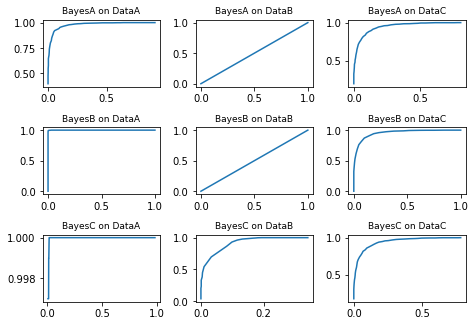

In [10]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)



### plotting Classifiers's data and decision boundary

### Calc ROCs ### Calc ROCs### Calc ROCs### Calc ROCs### Calc ROCs### Calc ROCs

plot_data_roc=[]
precision=50

for f in ['A','B']:
    x_val,y_val=[],[]
    for i in np.logspace(-2,2,precision):
        Y_test_pred_fa=choose_classifier(f,lsta[0],lsta[1],lsta[2],i)
        temp=tpr_fpr(Y_test_pred_fa,lsta[3])
        y_val.append(temp[0])
        x_val.append(temp[1])
    plot_data_roc.append([x_val,y_val])

x_val,y_val=[],[]
for i in np.logspace(-10,10,100):
    Y_test_pred_fa=choose_classifier('C',lsta[0],lsta[1],lsta[2],i)
    temp=tpr_fpr(Y_test_pred_fa,lsta[3])
    y_val.append(temp[0])
    x_val.append(temp[1])
plot_data_roc.append([x_val,y_val])

for f in ['A','B','C']:
    x_val,y_val=[],[]
    for i in np.logspace(-5,5,precision):
        Y_test_pred_fb=choose_classifier(f,lstb[0],lstb[1],lstb[2],i)
        temp=tpr_fpr(Y_test_pred_fb,lstb[3])
        y_val.append(temp[0])
        x_val.append(temp[1])
    plot_data_roc.append([x_val,y_val])

for f in ['A','B','C']:
    x_val,y_val=[],[]
    for i in np.logspace(-2,2,precision):
        Y_test_pred_fc=choose_classifier(f,lstc[0],lstc[1],lstc[2],i)
        temp=tpr_fpr(Y_test_pred_fc,lstc[3])
        y_val.append(temp[0])
        x_val.append(temp[1])
    plot_data_roc.append([x_val,y_val])


figure, axis = plt.subplots(3, 3)
# plt.figure(figsize=(18,16))
axis[0,0].plot(plot_data_roc[0][0],plot_data_roc[0][1])
axis[0,0].set_title("BayesA on DataA",fontsize=9)
axis[1,0].plot(plot_data_roc[1][0],plot_data_roc[1][1])
axis[1,0].set_title("BayesB on DataA",fontsize=9)
axis[2,0].plot(plot_data_roc[2][0],plot_data_roc[2][1])
axis[2,0].set_title("BayesC on DataA",fontsize=9)

axis[0,1].plot(plot_data_roc[3][0],plot_data_roc[3][1])
axis[0,1].set_title("BayesA on DataB",fontsize=9)
axis[1,1].plot(plot_data_roc[4][0],plot_data_roc[4][1])
axis[1,1].set_title("BayesB on DataB",fontsize=9)
axis[2,1].plot(plot_data_roc[5][0],plot_data_roc[5][1])
axis[2,1].set_title("BayesC on DataB",fontsize=9)

axis[0,2].plot(plot_data_roc[6][0],plot_data_roc[6][1])
axis[0,2].set_title("BayesA on DataC",fontsize=9)
axis[1,2].plot(plot_data_roc[7][0],plot_data_roc[7][1])
axis[1,2].set_title("BayesB on DataC",fontsize=9)
axis[2,2].plot(plot_data_roc[8][0],plot_data_roc[8][1])
axis[2,2].set_title("BayesC on DataC",fontsize=9)
# plot_data_roc.append([x_val,y_val])
plt.subplots_adjust(left=0.01,
                    bottom=0.01, 
                    right=0.99, 
                    top=0.99, 
                    wspace=0.3, 
                    hspace=0.6)


####6c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.

**Cell type : TextWrite**
(Write your observations and table of errors here)

|ERROR_RATE(%) |BayesA|BayesB|BayesC|
|------|------|------|------|
|DatasetA  |9.80 |22.9| 22.55|
|DatasetB  |50.85 |50.40| 7.45 |
|DatasetC  |11.75 |11.65| 11.79|

####6d) In the next Textwrite cell, summarise your observations regarding the nine learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)

1. DatasetA is the easiest to operate with, as the data points ("clusters") are far away and the decision boundary is easiest to deduce.
2. Among the three classifiers, BayesC will make the accurate decision boundary given the training data set. But in the above case BayesA is performing better on datasets. This might be a co-incidence as the testing data might be 'favourable' to the classifier - BayesA.
3. And 




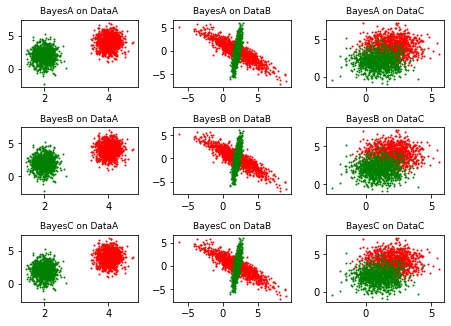

In [30]:
figure, axis = plt.subplots(3, 3)
# Plottign DEICSION BOUNDARIES!!!

# i=lsta[0] # xtrain #np.concatenate([lsta[0],lsta[2]])  
cnt=0
for j in ['A','B','C']:
    cnt_2=0
    for i in [lsta,lstb,lstc]:
        m,n=catog_indices( i[1] )
        v=i[0]
        axis[cnt,cnt_2].scatter(v[m][:,0],v[m][:,1],color='r',s = 1)
        axis[cnt,cnt_2].scatter(v[n][:,0],v[n][:,1],color='g',s = 1)  

        # X_train=lsta[0]
        # Y_train=lsta[1]
        # xlist = np.linspace(np.min(i[0][:,0]), np.max(i[0][:,0]), 100)
        # ylist = np.linspace(np.min(i[0][:,1]), np.max(i[0][:,1]), 100)
        # X_test_1,X_test_2 = np.meshgrid(xlist,ylist) 
        # Y_test_gr = np.zeros(X_test_1.shape)
        # Y_test_gr_a = np.zeros(X_test_1.shape)
        # for i in range(Y_test_gr_a.shape[0]):
        #     X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        #     X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        #     X_test_gr = np.transpose(X_test_gr)
        # Y_test_gr_a[i,:] = choose_classifier(j,lsta[0],lsta[1],X_test_gr,1)
                
        
        # d = plt.contourf(X_test_1,X_test_2,Y_test_gr,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.25)
        # plt.colorbar(d)
        # X, Y = np.meshgrid(xlist, ylist)
        # Z=choose_classifier(j,i[0], i[1], np.array([X,Y]), i)
        # cp = axis[cnt,cnt_2].contourf(X, Y, Z)
        cnt_2+=1
    cnt+=1

# axis[0,0].plot(plot_data_roc[1][0],plot_data_roc[1][1])
axis[0,0].set_title("BayesA on DataA",fontsize=9)
axis[1,0].set_title("BayesB on DataA",fontsize=9)
# axis[2,0].plot(plot_data_roc[2][0],plot_data_roc[2][1])
axis[2,0].set_title("BayesC on DataA",fontsize=9)

# axis[0,1].plot(plot_data_roc[3][0],plot_data_roc[3][1])
axis[0,1].set_title("BayesA on DataB",fontsize=9)
# axis[1,1].plot(plot_data_roc[4][0],plot_data_roc[4][1])
axis[1,1].set_title("BayesB on DataB",fontsize=9)
# axis[2,1].plot(plot_data_roc[5][0],plot_data_roc[5][1])
axis[2,1].set_title("BayesC on DataB",fontsize=9)

# axis[0,2].plot(plot_data_roc[6][0],plot_data_roc[6][1])
axis[0,2].set_title("BayesA on DataC",fontsize=9)
# axis[1,2].plot(plot_data_roc[7][0],plot_data_roc[7][1])
axis[1,2].set_title("BayesB on DataC",fontsize=9)
# axis[2,2].plot(plot_data_roc[8][0],plot_data_roc[8][1])
axis[2,2].set_title("BayesC on DataC",fontsize=9)
# # plot_data_roc.append([x_val,y_val])
plt.subplots_adjust(left=0.01,
                    bottom=0.01, 
                    right=0.99, 
                    top=0.99, 
                    wspace=0.3, 
                    hspace=0.6)
#####


